 # Online Shoppers Purchasing Intention

 ### Name: *AISWARYA PRASAD*
 ### Organization: Entri Elevate
 ### Evaluation date :

## Overview of Problem Statement
Predicting customer purchase behavior is essential for e-commerce businesses to increase conversions and optimize marketing strategies. However, user behavior is influenced by a variety of factors, making accurate prediction challenging. This project aims to predict whether an online shopper will make a purchase or not, based on the values of the given behavioral and technical features.

## Objective
To develop an effective machine learning model that can accurately predict an online shopper’s purchase intention based on the values of the given features.

## Data Description

Dataset Name:
Online Shoppers Purchasing Intention Dataset

Source:
The dataset is sourced from the UCI Machine Learning Repository. It includes user interaction data collected from an e-commerce website.

Dataset Information:
The dataset contains feature vectors for 12,330 individual sessions, with each session corresponding to a unique user over a 1-year period. 

Features:
The dataset consists of 18 input features and 1 target variable
 * Numerical Features:
Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay

 * Categorical Features:
Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend
 
Target Variable: Revenue - Indicates whether the user completed a purchase (TRUE) or not (FALSE)

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import joblib

## Data Collection

In [4]:
# Load the dataset
data_path = r"C:\Users\asus\Downloads\online_shoppers_intention.csv"
data = pd.read_csv(data_path)

## Overview of the Data

In [5]:
df=pd.DataFrame(data)

In [6]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traf

In [7]:
df=pd.DataFrame(data)
print("\nFirst 5 rows of data:")
df.head()


First 5 rows of data:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.shape

(12330, 18)

## Data Preprocessing

In [9]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [10]:
# Remove duplicate rows
df=df.drop_duplicates()

In [11]:
df.shape

(12205, 18)

## OUTLIER DETECTION

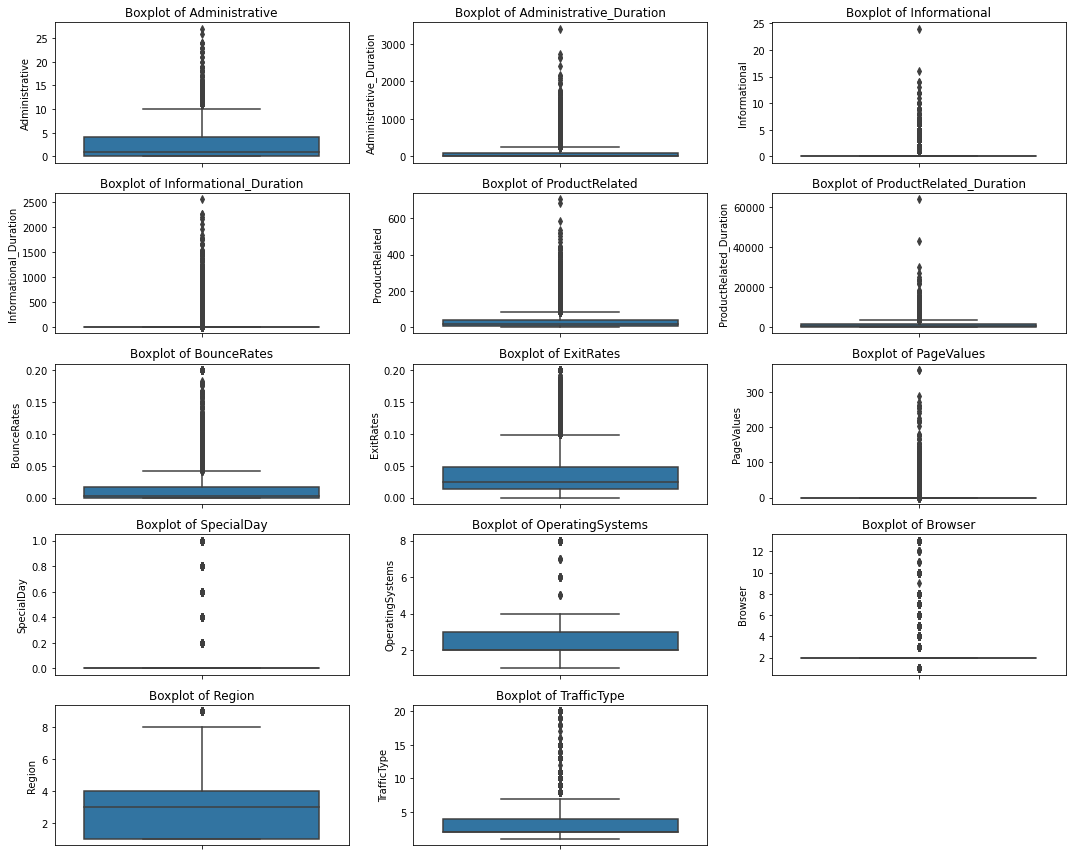

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Visualize outliers using boxplots
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

## OUTLIER HANDLING

In [13]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply IQR-based filtering to each numeric column
clean_df = df.copy()
for col in numeric_df.columns:
    clean_df = remove_outliers_iqr(clean_df, col)

# Result: clean_df has outliers removed
print("Original shape:", df.shape)
print("After outlier removal:", clean_df.shape)

Original shape: (12205, 18)
After outlier removal: (2581, 18)


### SKEWNWESS CHECKING

In [14]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Check skewness
skewness = numeric_df.skew()

# Identify skewed columns (threshold: absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index.tolist()

# Create a copy to apply log transformation
df_log_transformed = df.copy()

# Apply log transformation to skewed columns (after shifting to handle 0 or negative values)
for col in skewed_cols:
    min_val = df_log_transformed[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        df_log_transformed[col] = np.log(df_log_transformed[col] + shift)
    else:
        df_log_transformed[col] = np.log(df_log_transformed[col])

# Result: df_log_transformed contains log-transformed skewed features
print("Log transformation applied to:", skewed_cols)

Log transformation applied to: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


## Exploratory Data Analysis

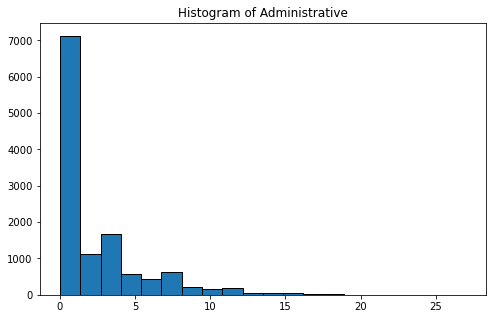

In [15]:
# Histogram
plt.figure(figsize=(8, 5))
plt.hist(data['Administrative'], bins=20, edgecolor='k')
plt.title('Histogram of Administrative')
plt.show()

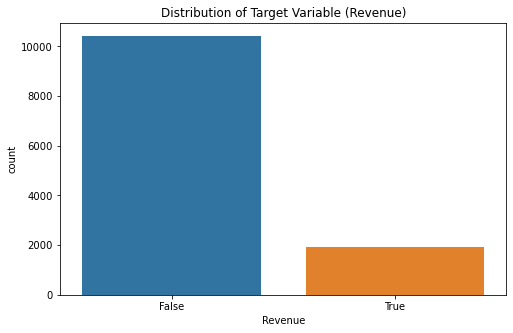

In [16]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of Target Variable (Revenue)')
plt.show()

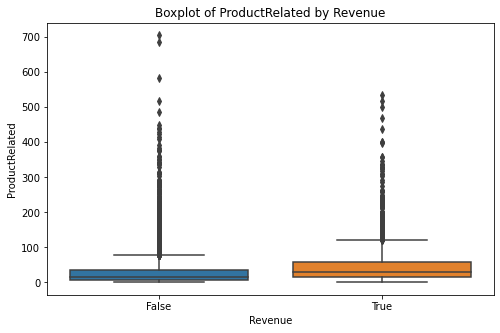

In [17]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Revenue', y='ProductRelated', data=data)
plt.title('Boxplot of ProductRelated by Revenue')
plt.show()

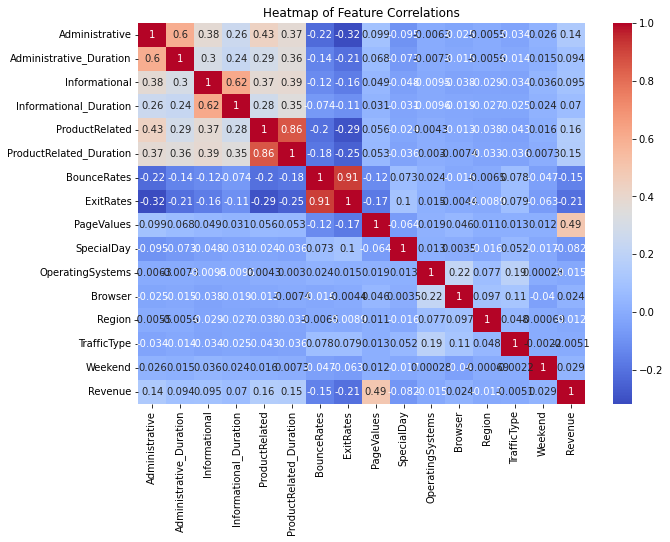

In [19]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

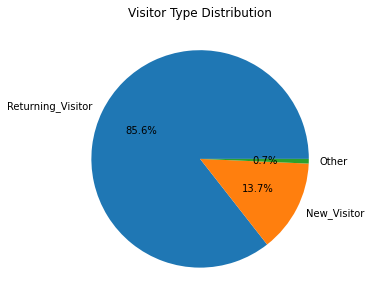

In [20]:
# Pie Chart
plt.figure(figsize=(8, 5))
data['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Visitor Type Distribution')
plt.ylabel('')
plt.show()

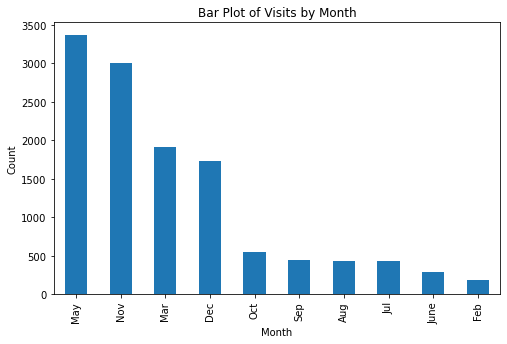

In [21]:
# Bar Plot
plt.figure(figsize=(8, 5))
data['Month'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Visits by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

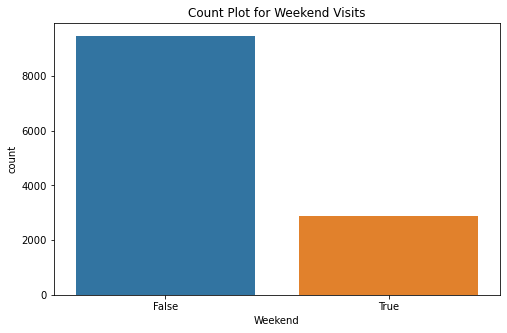

In [22]:
# Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Weekend', data=data)
plt.title('Count Plot for Weekend Visits')
plt.show()

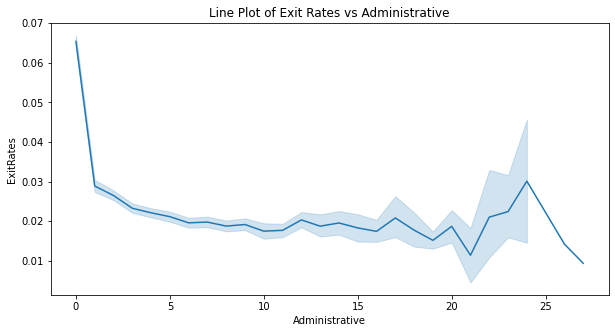

In [23]:
# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Administrative', y='ExitRates', data=data)
plt.title('Line Plot of Exit Rates vs Administrative')
plt.show()

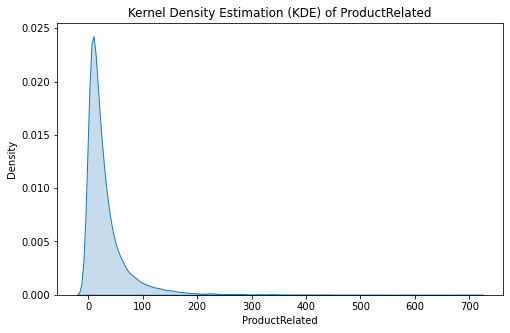

In [24]:
# KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data['ProductRelated'], shade=True)
plt.title('Kernel Density Estimation (KDE) of ProductRelated')
plt.show()

## Feature Engineering

In [25]:
# Convert binary categorical columns to integers
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [26]:
# Make a copy to work on
df1 = df.copy()

In [27]:
# Label encode 'VisitorType'
le = LabelEncoder()
df1['VisitorType'] = le.fit_transform(df1['VisitorType'])

# One-hot encode 'Month'
onehot = OneHotEncoder(sparse=False)
month_oh = onehot.fit_transform(df1[['Month']])
month_cols = onehot.get_feature_names(['Month'])

# Create one-hot DataFrame and merge
month_df = pd.DataFrame(month_oh, columns=month_cols, index=df1.index)
df1 = pd.concat([df1.drop(columns=['Month']), month_df], axis=1)

## Feature Selection

In [28]:
#Splitting the data

X = df1.drop(columns = ['Revenue'])
y = df1['Revenue']

In [29]:
selector = SelectKBest(score_func=f_classif, k=17)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features.tolist())

Selected Features:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType', 'Month_Dec', 'Month_Feb', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct']


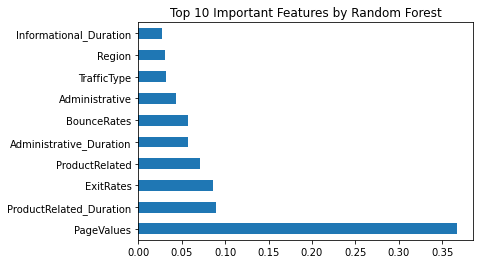

In [30]:
# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features by Random Forest')
plt.show()

## Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

## Feature Scaling

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing and Feature Selection Completed.")


Data Preprocessing and Feature Selection Completed.


## ML Model Building

In [33]:
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

## Model Evaluation

In [34]:
# Evaluate each model
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

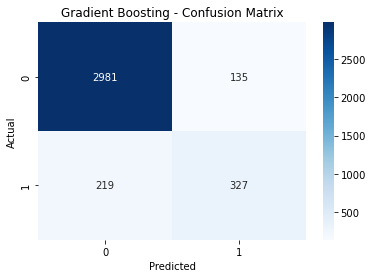

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Classification Metrics
print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"{name} Precision: {precision_score(y_test, y_pred):.2f}")
print(f"{name} Recall: {recall_score(y_test, y_pred):.2f}")
print(f"{name} F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

Gradient Boosting Accuracy: 0.90
Gradient Boosting Precision: 0.71
Gradient Boosting Recall: 0.60
Gradient Boosting F1-Score: 0.65
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3116
           1       0.71      0.60      0.65       546

    accuracy                           0.90      3662
   macro avg       0.82      0.78      0.80      3662
weighted avg       0.90      0.90      0.90      3662




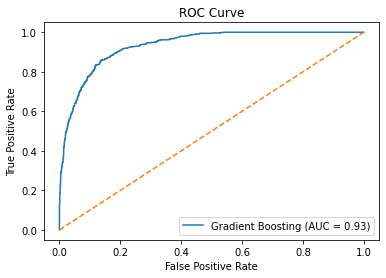

In [37]:
# ROC Curve
if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Hyper Parameter Tuning

## Pipeline Creation

In [38]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=17)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
print("Pipeline Accuracy (before tuning):", pipeline.score(X_test, y_test))

Pipeline Accuracy (before tuning): 0.903604587657018


In [39]:
param_grid = {
    'select__k': [8, 10, 12],
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [3, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'select__k': 8}
Best Accuracy: 0.8995668338031335


## Saving the model

In [40]:
# Save the best estimator from GridSearchCV
joblib.dump(pipeline, 'online_shopper_intention_pipeline 1.joblib')

print("Model saved successfully.")

Model saved successfully.


## Test with Unseen Data

In [41]:
# Load the saved pipeline
best_model = r"C:\Users\asus\OneDrive\Desktop\Data Science\online_shopper_intention_pipeline 1.joblib"
pipeline = joblib.load(best_model)
# Load unseen dataset
unseen_data = pd.read_excel("C:/Users/asus/Downloads/unseen data.xlsx")
unseen_df = pd.DataFrame(unseen_data) 

In [42]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           19 non-null     int64  
 1   Administrative_Duration  19 non-null     int64  
 2   Informational            19 non-null     int64  
 3   Informational_Duration   19 non-null     int64  
 4   ProductRelated           19 non-null     int64  
 5   ProductRelated_Duration  19 non-null     float64
 6   BounceRates              19 non-null     float64
 7   ExitRates                19 non-null     float64
 8   PageValues               19 non-null     int64  
 9   SpecialDay               19 non-null     float64
 10  Month                    19 non-null     object 
 11  OperatingSystems         19 non-null     int64  
 12  Browser                  19 non-null     int64  
 13  Region                   19 non-null     int64  
 14  TrafficType              19 

In [43]:
unseen_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0,0,1,0.000000,0.20,0.20,0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0,0,0,2,64.000000,0.00,0.10,0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0,0,0,1,0.000000,0.20,0.20,0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0,0,0,2,2.666667,0.05,0.14,0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0,0,0,10,627.500000,0.02,0.05,0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [44]:
#ENCODING THE UNSEEN DATA
#Convert Weekend to int
unseen_df['Weekend'] = unseen_df['Weekend'].astype(int)

#Label encode VisitorType (ensure same mapping as training)
le = LabelEncoder()
unseen_df['VisitorType'] = le.fit_transform(unseen_df['VisitorType'])

#One-hot encode Month
oh = OneHotEncoder(sparse=False)
month_oh = oh.fit_transform(unseen_df[['Month']])
# Retrieve column names compatibly
try:
    month_cols = oh.get_feature_names_out()
except AttributeError:
    month_cols = oh.get_feature_names(input_features=['Month'])
month_df = pd.DataFrame(month_oh, columns=month_cols, index=unseen_df.index)
unseen_df = pd.concat([unseen_df.drop(columns=['Month']), month_df], axis=1)

In [45]:
unseen_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month_Feb
0,0,0,0,0,1,0.000000,0.20,0.20,0,0.0,1,1,1,1,0,0,1.0
1,0,0,0,0,2,64.000000,0.00,0.10,0,0.0,2,2,1,2,0,0,1.0
2,0,0,0,0,1,0.000000,0.20,0.20,0,0.0,4,1,9,3,0,0,1.0
3,0,0,0,0,2,2.666667,0.05,0.14,0,0.0,3,2,2,4,0,0,1.0
4,0,0,0,0,10,627.500000,0.02,0.05,0,0.0,3,3,1,4,0,1,1.0


In [46]:
# Separate features for prediction
feature_cols = [c for c in unseen_df.columns if c != 'Revenue']
X_unseen = unseen_df[feature_cols]

In [47]:
# Scale features (or load saved scaler)
scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(X_unseen)

In [51]:
#  Predict and attach predictions
predictions = pipeline.predict(X_unseen_scaled)
print(f"Predictions: {predictions}")

Predictions: [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [52]:
unseen_df['Revenue'] = predictions

In [53]:
unseen_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month_Feb,Revenue
0,0,0,0,0,1,0.000000,0.200000,0.200000,0,0.0,1,1,1,1,0,0,1.0,0
1,0,0,0,0,2,64.000000,0.000000,0.100000,0,0.0,2,2,1,2,0,0,1.0,0
2,0,0,0,0,1,0.000000,0.200000,0.200000,0,0.0,4,1,9,3,0,0,1.0,0
3,0,0,0,0,2,2.666667,0.050000,0.140000,0,0.0,3,2,2,4,0,0,1.0,0
4,0,0,0,0,10,627.500000,0.020000,0.050000,0,0.0,3,3,1,4,0,1,1.0,1
5,0,0,0,0,19,154.216667,0.015789,0.024561,0,0.0,2,2,1,3,0,0,1.0,0
6,0,0,0,0,1,0.000000,0.200000,0.200000,0,0.4,2,4,3,3,0,0,1.0,0
7,1,0,0,0,0,0.000000,0.200000,0.200000,0,0.0,1,2,1,5,0,1,1.0,1
8,0,0,0,0,2,37.000000,0.000000,0.100000,0,0.8,2,2,2,3,0,0,1.0,0
9,0,0,0,0,3,738.000000,0.000000,0.022222,0,0.4,2,4,1,2,0,0,1.0,0


## Conclusion
This project demonstrates that machine learning can effectively predict online shoppers’ purchasing intentions by leveraging session-based behavioral data. By examining metrics such as session duration, page views, bounce and exit rates, and visitor type, the model isolates the most impactful features driving purchase decisions. Classification algorithms—particularly ensemble methods—achieved strong predictive accuracy, confirming their value for e-commerce analytics. These results underscore the potential of behavior-driven insights to inform targeted marketing strategies and improve conversion outcomes.

## Future Work


**Boost Accuracy**: Fine-tune models, try deep learning (e.g. neural networks), and use ensemble stacking. 

**Handle Imbalance**: Apply resampling methods (SMOTE, undersampling) to even out classes.

**Add More Features**: Bring in demographics, clickstream sequences, time-of-day, promotions, etc.

**Keep It Fresh**: Regularly retrain with new session data to stay up to date.

**Real-Time Scoring**: Deploy live inference so you can act on intent as it happens. 

**Cross-Industry Use**: Test the approach in other fields (travel, media, B2B).

**Smart Recommendations**: Tie purchase-intent scores into your recommendation engine for spot-on product suggestions.